In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:

comp = pd.read_csv("companies.csv")
acq = pd.read_csv("acquisitions.csv")
inv = pd.read_csv("investments.csv")
rds = pd.read_csv("rounds.csv")

In [3]:
comp.info()
acq.info()
inv.info()
rds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
permalink            66368 non-null object
name                 66367 non-null object
homepage_url         61310 non-null object
category_list        63220 non-null object
funding_total_usd    66368 non-null object
status               66368 non-null object
country_code         59410 non-null object
state_code           57821 non-null object
region               58338 non-null object
city                 58340 non-null object
funding_rounds       66368 non-null int64
founded_at           51147 non-null object
first_funding_at     66344 non-null object
last_funding_at      66368 non-null object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18968 entries, 0 to 18967
Data columns (total 18 columns):
company_permalink         18968 non-null object
company_name              18968 non-null object
company_category_list     13985 no

In [4]:
comp_filter = comp[comp['first_funding_at']>= '1990-01-01']

In [5]:
comp_filter.head(2)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14


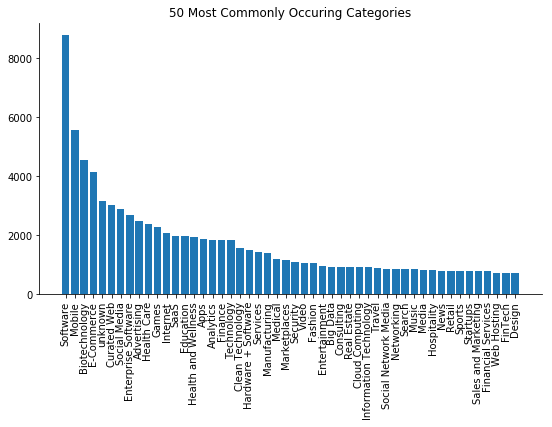

In [52]:
comp.head(2)
nonoperating_companies_df = comp
# Fill empty category with 'unknown'
nonoperating_companies_df.category_list.fillna('unknown', inplace=True)
# Create column with list of categories
nonoperating_companies_df[
    'cat_list'] = nonoperating_companies_df.category_list.apply(str.split,
                                                                sep='|')
# Create list of category lists
categories = list(nonoperating_companies_df.cat_list)
# Flatten the list
flat_categories = [cat for sublist in categories for cat in sublist]
# Count occurences of each
category_counts = Counter(flat_categories).most_common()
# Look at the distribution
plt.figure(figsize=(9, 5))
plt.bar([x[0] for x in category_counts[0:50]],
        [x[1] for x in category_counts[0:50]],
        width=0.8)
plt.xticks(rotation=90)
plt.title('50 Most Commonly Occuring Categories')
sns.despine()

In [6]:
# how many categories?
cat_comp_dict = {}
comp_cat_dict = {}
cat_dict={}
l_maxlen = 0
all_cat_list = []
for idx, s in enumerate(comp_filter["category_list"]):
    if type(s) != str:
        cat_dict[idx] = 0
        continue
    l = s.split("|")
    
    #print(len(l))
    comp_cat_dict[idx] = l
    #print(comp_cat_dict[idx])
    if len(l) > l_maxlen:
        l_maxlen = len(l) # length of the categories
        l_max_show = l
#         
        #print(l_max_show)
        #print(l_maxlen)
    for i in l:
        all_cat_list.append(i)
        
        if i not in cat_comp_dict.keys():
            
            cat_comp_dict[i] = []
        cat_comp_dict[i].append(idx)
        
print(len(cat_comp_dict))
#print(cat_comp_dict)
print(l_maxlen)
#print(l_max_show)


858
44


In [7]:
all_cat_stats = Counter(all_cat_list)
all_cat_stats = pd.DataFrame.from_dict(all_cat_stats, orient='index', columns=['num of companies'])
all_cat_stats['percentage of total companies'] = all_cat_stats['num of companies'] / len(comp_filter) * 100
all_cat_stats = all_cat_stats.sort_values('percentage of total companies',ascending=False)

#all_cat_stats

In [8]:
sub_cat_dataset = {}
sub_status = {}

for cat, cid in cat_comp_dict.items():
    df = comp_filter.iloc[cid,:]
    
    sub_cat_dataset[cat] = df
    
    sub_status[cat] = dict(df.groupby('status')['name'].count())#

sub_status

{'Media': {'acquired': 65, 'closed': 71, 'ipo': 11, 'operating': 682},
 'Application Platforms': {'acquired': 11,
  'closed': 43,
  'ipo': 2,
  'operating': 198},
 'Real Time': {'acquired': 35, 'closed': 29, 'ipo': 3, 'operating': 307},
 'Social Network Media': {'acquired': 76,
  'closed': 140,
  'ipo': 6,
  'operating': 631},
 'Apps': {'acquired': 97, 'closed': 162, 'ipo': 7, 'operating': 1610},
 'Games': {'acquired': 223, 'closed': 273, 'ipo': 32, 'operating': 1756},
 'Mobile': {'acquired': 546, 'closed': 478, 'ipo': 75, 'operating': 4454},
 'Curated Web': {'acquired': 407, 'closed': 525, 'ipo': 38, 'operating': 2059},
 'Software': {'acquired': 1071, 'closed': 645, 'ipo': 160, 'operating': 6883},
 'Biotechnology': {'acquired': 371,
  'closed': 274,
  'ipo': 476,
  'operating': 3439},
 'Analytics': {'acquired': 218, 'closed': 81, 'ipo': 23, 'operating': 1516},
 'E-Commerce': {'acquired': 263, 'closed': 334, 'ipo': 59, 'operating': 3493},
 'Entertainment': {'acquired': 58, 'closed': 83

In [10]:
sub_status_df = pd.DataFrame.from_dict(sub_status, orient='index')
sub_status_df.fillna(0, inplace=True)
#sub_status_df['total'] = sub_status_df['acquired'] + sub_status_df['closed'] + sub_status_df['ipo'] + sub_status_df['operating']

sub_status_df.head(7)

,acquired,closed,ipo,operating
3D,10.0,11.0,1.0,127.0
3D Printing,0.0,3.0,1.0,102.0
3D Technology,2.0,3.0,0.0,67.0
Accounting,12.0,5.0,2.0,114.0
Active Lifestyle,0.0,1.0,0.0,29.0
Ad Targeting,10.0,7.0,3.0,87.0
Adaptive Equipment,0.0,0.0,0.0,5.0


In [11]:
sub_status_arr = sub_status_df.to_numpy()

tot = np.sum(sub_status_arr, axis=1)
# print(len(tot))
acq_p = sub_status_arr[:,0] / tot *100
# print(len(acq_p))
closed_p = sub_status_arr[:,1] / tot * 100
ipo_p = sub_status_arr[:,2] / tot * 100
operating_p = sub_status_arr[:,3] / tot * 100

sub_status_df['total'] = tot
sub_status_df['acq_percent'] = acq_p
sub_status_df['closed_percent'] = closed_p
sub_status_df['ipo_percent'] = ipo_p
sub_status_df['operating_percent'] = operating_p

#sub_status_df = sub_status_df.sort_values('total', ascending=False)
sub_status_df.head()

,acquired,closed,ipo,operating,total,acq_percent,closed_percent,ipo_percent,operating_percent
3D,10.0,11.0,1.0,127.0,149.0,6.711409,7.382550,0.671141,85.234899
3D Printing,0.0,3.0,1.0,102.0,106.0,0.000000,2.830189,0.943396,96.226415
3D Technology,2.0,3.0,0.0,67.0,72.0,2.777778,4.166667,0.000000,93.055556
Accounting,12.0,5.0,2.0,114.0,133.0,9.022556,3.759398,1.503759,85.714286
Active Lifestyle,0.0,1.0,0.0,29.0,30.0,0.000000,3.333333,0.000000,96.666667


In [12]:
# split the category column
# new data frame with split value columns 
new = comp_filter["category_list"].str.split("|", n = 3, expand = True) 
new

,0,1,2,3
0,Media,None,None,None
1,Application Platforms,Real Time,Social Network Media,None
2,Apps,Games,Mobile,None
3,Curated Web,None,None,None
4,Software,None,None,None
5,Games,None,None,None
6,Biotechnology,None,None,None
7,Analytics,None,None,None
8,Mobile,None,None,None
9,E-Commerce,None,None,None


In [13]:
comp_filter["category_1"]= new[0] 
  
# making seperate last name column from new data frame 
comp_filter["category_2"]= new[1] 

comp_filter["category_3"]= new[2] 
  
# making seperate last name column from new data frame 
comp_filter["category_4"]= new[3] 
comp_filter.drop(columns =["category_list"], inplace = True) 

# df display 
comp_filter.head()

,permalink,name,homepage_url,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_1,category_2,category_3,category_4
0,/organization/-fame,#fame,http://livfame.com,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,Media,None,None,None
1,/organization/-qounter,:Qounter,http://www.qounter.com,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Application Platforms,Real Time,Social Network Media,None
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,Apps,Games,Mobile,None
3,/organization/0-6-com,0-6.com,http://www.0-6.com,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Curated Web,None,None,None
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Software,None,None,None


In [14]:
data_stats = comp_filter.groupby('status').count()
data_stats

,permalink,name,homepage_url,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_1,category_2,category_3,category_4
status,,,,,,,,,,,,,,,,
acquired,5540,5540,5081,5540,5240,5180,5195,5195,5540,4328,5540,5540,5421,2774,2054,1084
closed,6216,6215,5512,6216,4572,4442,4473,4473,6216,4067,6216,6216,5274,2945,2260,940
ipo,1543,1543,1507,1543,1503,1476,1487,1487,1543,1183,1543,1543,1530,716,356,161
operating,52998,52998,49159,52998,48036,46666,47126,47128,52998,41515,52998,52998,50940,26926,20843,11078


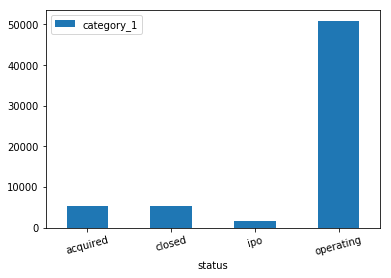

In [15]:
data_stats.plot.bar(y='category_1',rot=15)

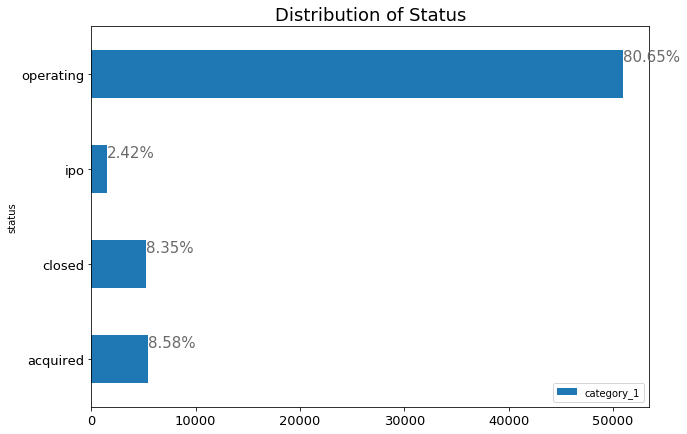

In [16]:
ax = data_stats.plot(kind='barh', y='category_1', figsize=(10,7), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution of Status", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,color='dimgrey')

# # invert for largest on top 
# ax.invert_yaxis()
plt.show()

In [18]:
# Check the companies with same names
names = comp_filter['name']
#print(sorted(Counter(names).items(), key=lambda x: x[1], reverse=True))
comp_filter

,permalink,name,homepage_url,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_1,category_2,category_3,category_4
0,/organization/-fame,#fame,http://livfame.com,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,Media,None,None,None
1,/organization/-qounter,:Qounter,http://www.qounter.com,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Application Platforms,Real Time,Social Network Media,None
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,Apps,Games,Mobile,None
3,/organization/0-6-com,0-6.com,http://www.0-6.com,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Curated Web,None,None,None
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Software,None,None,None
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01,Games,None,None,None
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,Biotechnology,None,None,None
7,/organization/0xdata,H2O.ai,http://h2o.ai/,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,Analytics,None,None,None
8,/organization/1,One Inc.,http://whatis1.com,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,Mobile,None,None,None
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18,E-Commerce,None,None,None


In [19]:
comp_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66297 entries, 0 to 66367
Data columns (total 17 columns):
permalink            66297 non-null object
name                 66296 non-null object
homepage_url         61259 non-null object
funding_total_usd    66297 non-null object
status               66297 non-null object
country_code         59351 non-null object
state_code           57764 non-null object
region               58281 non-null object
city                 58283 non-null object
funding_rounds       66297 non-null int64
founded_at           51093 non-null object
first_funding_at     66297 non-null object
last_funding_at      66297 non-null object
category_1           63165 non-null object
category_2           33361 non-null object
category_3           25513 non-null object
category_4           13263 non-null object
dtypes: int64(1), object(16)
memory usage: 9.1+ MB


In [20]:
comp_filter['label'] = 0
comp_filter.loc[comp_filter.status == 'ipo', 'label'] = 1
comp_filter.loc[comp_filter.status == 'acquired', 'label'] = 1

In [22]:
comp_filter.tail()

,permalink,name,homepage_url,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_1,category_2,category_3,category_4,label
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01,Enterprise Software,None,None,None,0
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,Advertising,Mobile,Web Development,Wireless,0
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,NaN,NaN,NaN,NaN,0
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,Consumer Electronics,Internet of Things,Telecommunications,None,0
66367,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,http://inovatiff.com,14851,operating,NaN,NaN,NaN,NaN,1,NaN,2013-10-01,2013-10-01,Consumer Goods,E-Commerce,Internet,None,0


In [23]:
comp_filter.to_csv("comp_filter.csv", index=False, encoding='utf8')

## NEW CONSOLIDATED DATASET COM_FILTER CREATED AND COMPILED INTO DF DATAFRAME

In [24]:
df = pd.read_csv('comp_filter.csv')

In [25]:
df.head()

,permalink,name,homepage_url,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_1,category_2,category_3,category_4,label
0,/organization/-fame,#fame,http://livfame.com,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,Media,NaN,NaN,NaN,0
1,/organization/-qounter,:Qounter,http://www.qounter.com,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Application Platforms,Real Time,Social Network Media,NaN,0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,Apps,Games,Mobile,NaN,0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Curated Web,NaN,NaN,NaN,0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Software,NaN,NaN,NaN,0


In [26]:
investor = pd.read_csv('investments.csv')
investor.head(50)

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,41250.0
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0
5,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0
6,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,2013-01-03,1700000.0
7,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,2014-07-19,8900000.0
8,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/paxion-capital-partners,Paxion Capital Partners,NaN,NaN,NaN,NaN,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0
9,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/transamerica,Transamerica,USA,IA,Cedar Rapids,Cedar Rapids,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0


In [27]:
investor_num = investor[['company_permalink',
                         'investor_permalink']].groupby(['company_permalink']).agg(['count'])

In [28]:
investor_num.head(2)

,investor_permalink
,count
company_permalink,
/organization/0-6-com,1
/organization/004-technologies,1


In [29]:
comp_plus_InvestorNum = pd.merge(how='inner',left=df, right=investor_num, 
                                 left_on='permalink', right_on='company_permalink')

In [32]:
#comp_plus_InvestorNum.head()
comp_plus_InvestorNum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44682 entries, 0 to 44681
Data columns (total 19 columns):
permalink                      44682 non-null object
name                           44681 non-null object
homepage_url                   41931 non-null object
funding_total_usd              44682 non-null object
status                         44682 non-null object
country_code                   39700 non-null object
state_code                     38516 non-null object
region                         38879 non-null object
city                           38881 non-null object
funding_rounds                 44682 non-null int64
founded_at                     33278 non-null object
first_funding_at               44682 non-null object
last_funding_at                44682 non-null object
category_1                     42263 non-null object
category_2                     22862 non-null object
category_3                     17637 non-null object
category_4                     9331 non-null

In [33]:
comp_plus_InvestorNum.to_csv('comp_plus_InvestorNum.csv',index=False, encoding='utf8')


In [34]:
df = pd.read_csv('comp_plus_InvestorNum.csv')
df.head()

,permalink,name,homepage_url,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_1,category_2,category_3,category_4,label,"('investor_permalink', 'count')"
0,/organization/0-6-com,0-6.com,http://www.0-6.com,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Curated Web,NaN,NaN,NaN,0,1
1,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Software,NaN,NaN,NaN,0,1
2,/organization/01games-technology,01Games Technology,http://www.01games.hk/,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01,Games,NaN,NaN,NaN,0,1
3,/organization/0xdata,H2O.ai,http://h2o.ai/,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,Analytics,NaN,NaN,NaN,0,14
4,/organization/1,One Inc.,http://whatis1.com,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,Mobile,NaN,NaN,NaN,0,13


In [35]:
df.rename(columns={"('investor_permalink', 'count')": "num_of_investor"}, inplace=True)
#df['Num_of_investor'] = df.iloc[:,-1]

In [36]:
# convert '-' to NAN in comp['funding_total_usd']:
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

In [37]:
df.head()

,permalink,name,homepage_url,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category_1,category_2,category_3,category_4,label,num_of_investor
0,/organization/0-6-com,0-6.com,http://www.0-6.com,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Curated Web,NaN,NaN,NaN,0,1
1,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Software,NaN,NaN,NaN,0,1
2,/organization/01games-technology,01Games Technology,http://www.01games.hk/,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01,Games,NaN,NaN,NaN,0,1
3,/organization/0xdata,H2O.ai,http://h2o.ai/,33600000.0,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,Analytics,NaN,NaN,NaN,0,14
4,/organization/1,One Inc.,http://whatis1.com,1150050.0,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,Mobile,NaN,NaN,NaN,0,13


In [40]:
# calculate the funding_duration between 'first_funding_at' and 'last_funding_at'
t1 = pd.to_datetime(df.first_funding_at, errors='coerce')
t1 = pd.to_timedelta(t1).dt.days
t2 = pd.to_datetime(df.last_funding_at, errors='coerce')
t2 = pd.to_timedelta(t2).dt.days

In [41]:
# funding_duration means how many days between the first and last fund raising.
df['funding_duration'] = t2 - t1

In [42]:
df['funding_duration']

0           0
1           0
2           0
3        1040
4         931
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12        411
13       2221
14       1054
15          0
16       1307
17        949
18        243
19        328
20         28
21          0
22        365
23          0
24        189
25          0
26        187
27          0
28          0
29          0
         ... 
44652     122
44653     608
44654       0
44655    2601
44656       0
44657    2647
44658    3153
44659     531
44660    1126
44661    2552
44662       0
44663     212
44664     304
44665       0
44666    1509
44667       0
44668     858
44669    1517
44670     209
44671      61
44672    1872
44673     728
44674       0
44675       0
44676     338
44677       0
44678     851
44679       0
44680       0
44681       0
Name: funding_duration, Length: 44682, dtype: int64

In [43]:
# convert datetime type for "last_funding_at","first_funding_at"

df['first_funding_at_UTC'] = t1
df['last_funding_at_UTC'] = t2

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44682 entries, 0 to 44681
Data columns (total 22 columns):
permalink               44682 non-null object
name                    44681 non-null object
homepage_url            41931 non-null object
funding_total_usd       36167 non-null float64
status                  44682 non-null object
country_code            39700 non-null object
state_code              38516 non-null object
region                  38879 non-null object
city                    38881 non-null object
funding_rounds          44682 non-null int64
founded_at              33278 non-null object
first_funding_at        44682 non-null object
last_funding_at         44682 non-null object
category_1              42263 non-null object
category_2              22862 non-null object
category_3              17637 non-null object
category_4              9331 non-null object
label                   44682 non-null int64
num_of_investor         44682 non-null int64
funding_duration    

In [45]:
df.head()

,permalink,name,homepage_url,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,last_funding_at,category_1,category_2,category_3,category_4,label,num_of_investor,funding_duration,first_funding_at_UTC,last_funding_at_UTC
0,/organization/0-6-com,0-6.com,http://www.0-6.com,2000000.0,operating,CHN,22,Beijing,Beijing,1,...,2008-03-19,Curated Web,NaN,NaN,NaN,0,1,0,13957,13957
1,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,...,2014-07-24,Software,NaN,NaN,NaN,0,1,0,16275,16275
2,/organization/01games-technology,01Games Technology,http://www.01games.hk/,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,...,2014-07-01,Games,NaN,NaN,NaN,0,1,0,16252,16252
3,/organization/0xdata,H2O.ai,http://h2o.ai/,33600000.0,operating,USA,CA,SF Bay Area,Mountain View,4,...,2015-11-09,Analytics,NaN,NaN,NaN,0,14,1040,15708,16748
4,/organization/1,One Inc.,http://whatis1.com,1150050.0,operating,USA,CA,SF Bay Area,San Francisco,3,...,2014-02-05,Mobile,NaN,NaN,NaN,0,13,931,15175,16106


In [46]:
df.to_csv('companies_allFeatures.csv', index=False, encoding='utf8')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44682 entries, 0 to 44681
Data columns (total 22 columns):
permalink               44682 non-null object
name                    44681 non-null object
homepage_url            41931 non-null object
funding_total_usd       36167 non-null float64
status                  44682 non-null object
country_code            39700 non-null object
state_code              38516 non-null object
region                  38879 non-null object
city                    38881 non-null object
funding_rounds          44682 non-null int64
founded_at              33278 non-null object
first_funding_at        44682 non-null object
last_funding_at         44682 non-null object
category_1              42263 non-null object
category_2              22862 non-null object
category_3              17637 non-null object
category_4              9331 non-null object
label                   44682 non-null int64
num_of_investor         44682 non-null int64
funding_duration    